Chapter 5
# 切豆腐展示RGB色彩空间内部
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 定义函数

In [2]:
# 自定义函数，生成三维网格数据

def color_cubic(num):

    x1 = np.linspace(0,1,num)
    x2 = x1
    x3 = x1
    
    # 生成三维数据网格
    xx1,xx2,xx3 = np.meshgrid(x1,x2,x3)
    
    # 将三维数组展成一维
    x1_ = xx1.ravel() 
    x2_ = xx2.ravel()
    x3_ = xx3.ravel()

    colors_all     = np.column_stack([x1_,x2_,x3_])
    # 将一维数组作为列堆叠成二维数组
    
    # 利用面具 (mask) 做筛选
    # 仅仅保留立方体三个朝外的立面：
    # 颜色相对较为鲜亮
    colors_bright  = colors_all[np.any(colors_all == 1, axis=1)]
    
    # 仅仅保留立方体三个朝内的立面：
    # 颜色相对较为暗沉
    colors_dark    = colors_all[np.any(colors_all == 0, axis=1)]
    
    return colors_all, colors_bright, colors_dark


In [3]:
# 定义三根线的坐标
line1_x = [1,1]
line1_y = [1,1]
line1_z = [1,0]

line2_x = [1,1]
line2_y = [1,0]
line2_z = [1,1]

line3_x = [1,0]
line3_y = [1,1]
line3_z = [1,1]

### 整个色彩空间采样，散点稀疏

In [4]:
colors_all, colors_bright, colors_dark = color_cubic(25)

### 红色渐变切片

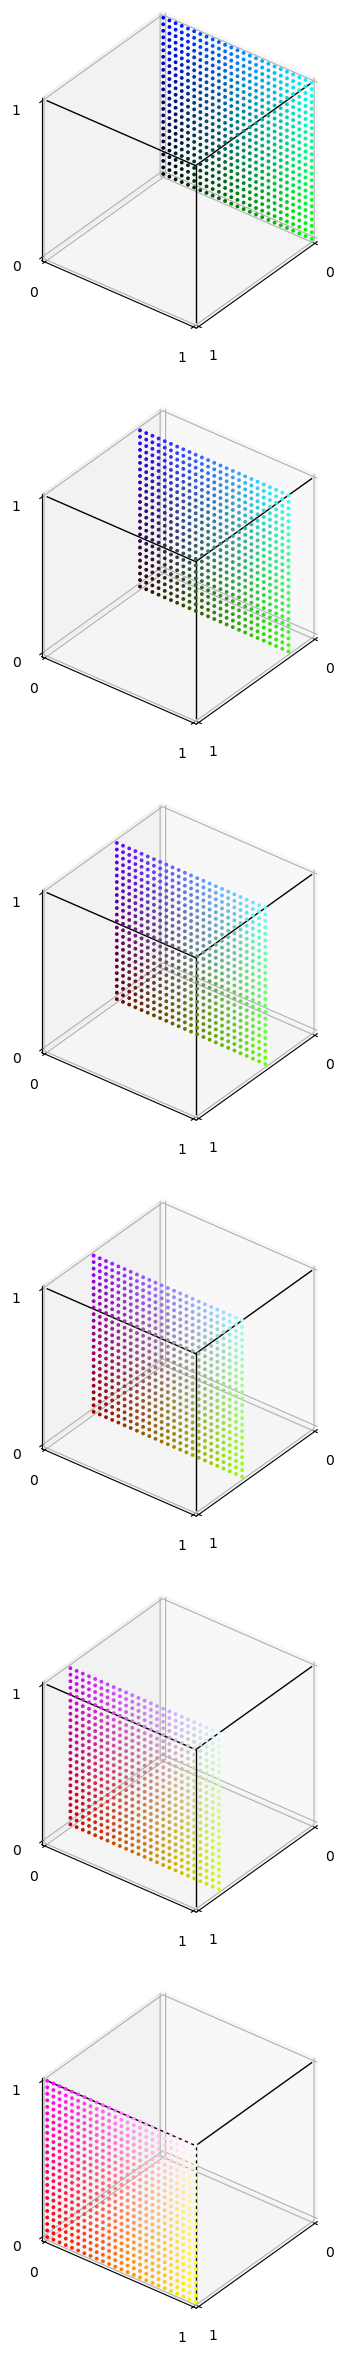

In [5]:
colors_one_facet = colors_all[colors_all[:,0] == 0]
# 将红色置 0

red_levels = np.linspace(0, 1, 6)
# 定义每个切片红色的色号

fig = plt.figure(figsize=(5, 30))

for idx, Red_level in enumerate(red_levels):
    
    colors_one_facet_idx = np.copy(colors_one_facet)
    # 获得数组副本
    # 用 numpy.copy() 复制时，不改变原数据
                                       
    colors_one_facet_idx[:,0] = colors_one_facet_idx[:,0] + Red_level
    # 给切片红色赋值
    
    # 三维散点可视化
    
    
    ax = fig.add_subplot(len(red_levels), 1, # 增加子图，6列、1行
                         idx + 1,            # 子图索引
                         projection = '3d')  # 子图为3D轴

    ax.plot(line1_x, line1_y, line1_z, alpha = 1, linewidth = 1, color='k')
    ax.plot(line2_x, line2_y, line2_z, alpha = 1, linewidth = 1, color='k')
    ax.plot(line3_x, line3_y, line3_z, alpha = 1, linewidth = 1, color='k')

    ax.scatter(colors_one_facet_idx[:,0], 
               colors_one_facet_idx[:,1], 
               colors_one_facet_idx[:,2], 
               c = colors_one_facet_idx, 
               s = 3,
               alpha = 1)

    ax.view_init(azim=30, elev=30)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_zlim(0,1)
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_zticks([0,1])

    # ax.grid(False)
    ax.set_proj_type('ortho')
    ax.set_box_aspect(aspect = (1,1,1))
    ax.view_init(azim=38, elev=34)
    
fig.savefig('Figures/红色渐变切片，稀疏.svg', format='svg')    

### 绿色渐变切片

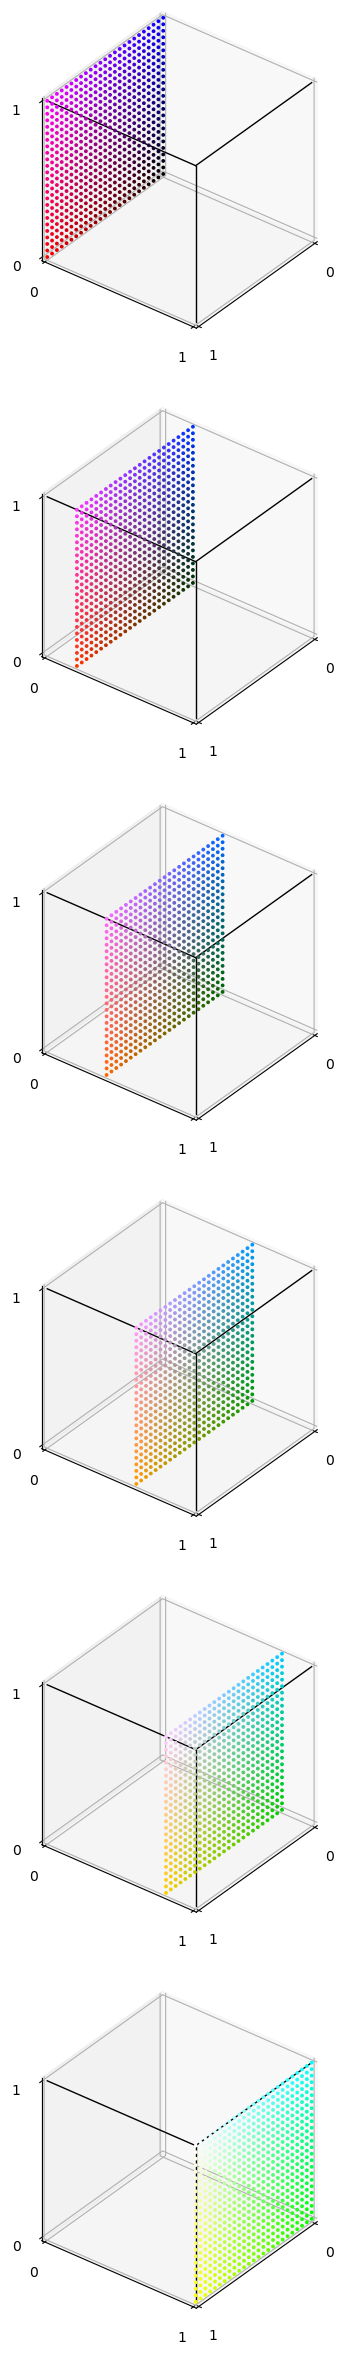

In [6]:
colors_one_facet = colors_all[colors_all[:,1] == 0]
# 将绿色置 0

green_levels = np.linspace(0, 1, 6)
# 定义每个切片绿色的色号

# 请大家自行补充注释

fig = plt.figure(figsize=(5, 30))

for idx, green_level in enumerate(green_levels):
    
    colors_one_facet_idx = np.copy(colors_one_facet)
                                       
    colors_one_facet_idx[:,1] = colors_one_facet_idx[:,1] + green_level
    
    ax = fig.add_subplot(len(red_levels), 1, idx + 1, projection = '3d')

    ax.plot(line1_x, line1_y, line1_z, alpha = 1, linewidth = 1, color='k')
    ax.plot(line2_x, line2_y, line2_z, alpha = 1, linewidth = 1, color='k')
    ax.plot(line3_x, line3_y, line3_z, alpha = 1, linewidth = 1, color='k')

    ax.scatter(colors_one_facet_idx[:,0], 
               colors_one_facet_idx[:,1], 
               colors_one_facet_idx[:,2], 
               c = colors_one_facet_idx, 
               s = 3,
               alpha = 1)

    ax.view_init(azim=30, elev=30)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_zlim(0,1)
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_zticks([0,1])

    # ax.grid(False)
    ax.set_proj_type('ortho')
    ax.set_box_aspect(aspect = (1,1,1))
    ax.view_init(azim=38, elev=34)
    
fig.savefig('Figures/绿色渐变切片，稀疏.svg', format='svg')    

### 蓝色渐变切片

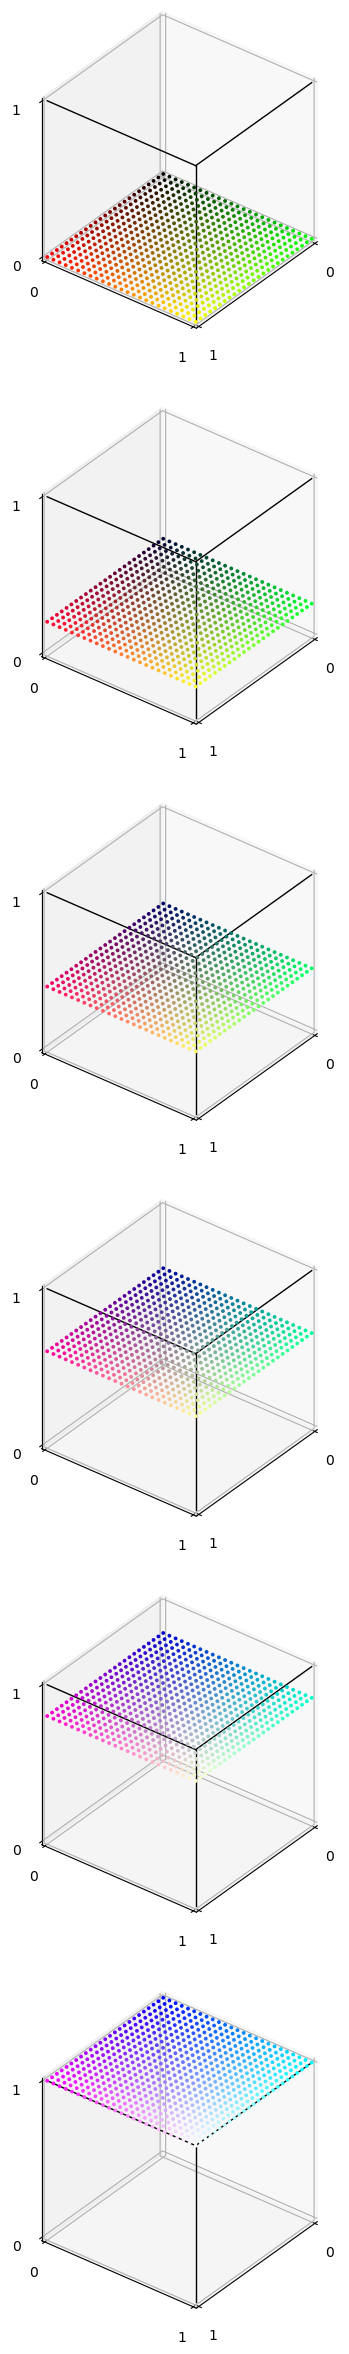

In [7]:
colors_all, colors_bright, colors_dark = color_cubic(25)

colors_one_facet = colors_all[colors_all[:,2] == 0]

blue_levels = np.linspace(0, 1, 6)

fig = plt.figure(figsize=(5, 30))

for idx, blue_level in enumerate(blue_levels):
    
    colors_one_facet_idx = np.copy(colors_one_facet)
                                       
    colors_one_facet_idx[:,2] = colors_one_facet_idx[:,2] + blue_level
    
    ax = fig.add_subplot(len(red_levels), 1, idx + 1, projection = '3d')

    ax.plot(line1_x, line1_y, line1_z, alpha = 1, linewidth = 1, color='k')
    ax.plot(line2_x, line2_y, line2_z, alpha = 1, linewidth = 1, color='k')
    ax.plot(line3_x, line3_y, line3_z, alpha = 1, linewidth = 1, color='k')

    ax.scatter(colors_one_facet_idx[:,0], 
               colors_one_facet_idx[:,1], 
               colors_one_facet_idx[:,2], 
               c = colors_one_facet_idx, 
               s = 3,
               alpha = 1)

    ax.view_init(azim=30, elev=30)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_zlim(0,1)
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_zticks([0,1])

    # ax.grid(False)
    ax.set_proj_type('ortho')
    ax.set_box_aspect(aspect = (1,1,1))
    ax.view_init(azim=38, elev=34)
    
fig.savefig('Figures/蓝色渐变切片，稀疏.svg', format='svg')       

In [8]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023